In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.shape

(5172, 3002)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [8]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
logreg=LogisticRegression(solver='liblinear')

In [15]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [16]:
y_pred=logreg.predict(X_test)

In [17]:
from sklearn.metrics import roc_curve

In [20]:
y_pred_prob=logreg.predict_proba(X_test)[:,1]

In [21]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

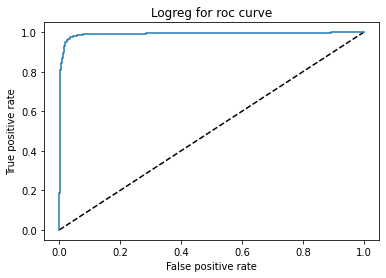

In [27]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logreg for roc curve')
plt.show()

# AUC (Area under roc)

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test,y_pred_prob)

0.9909783926192313

# AUC using Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_scores = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

In [36]:
print(cv_scores)

[0.98626304 0.99203628 0.98591281 0.9823297  0.98060854]
